# Python Library for EE

## Some Python basics

### Python functions

Here are essential things you need to know about Python functions:

* Functions can be treated like Python objects
* Functions can be defined using either the `def` or `lambda` statements.
* `def` defines multiline functions that terminate and return values specified by the `return` statement.
* `lambda` defines single line functions that return a value.

The following cells demonstrate these points in the process of computing a numerical solution to the system of differential equations describing the motion of a mass $m$ subject to a time-varying force $f(t)$

\begin{align}
\frac{dx}{dt} & = v \\
\frac{dv}{dt} & = \frac{1}{m} f(t) \\
\end{align}

for various choices of $f(t)$. The cells show several different ways of coding $f(t)$, and the vector valued right hand sides of this system of differential equations, as Python functions. 

#### Functions are Python objects

The first aspect of this simulation is to establish a specific function to describe the time-varying force $f(t)$. As an example, the following cell creates a plot of $\cos(t)$ using the `numpy` library.

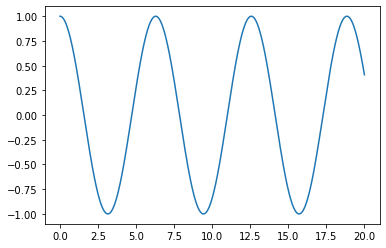

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 1000)
plt.plot(t, np.cos(t))

In Python, the notation `np.cos(t)` returns the value of $cos(t)$ for a specific value of time $t$. The notation `np.cos` (note the absence of parentheses after the function name) refers to the function itself, the function being the object that does the computation. An important feature of Python is that functions can be assigned and manipulated like other Python objects.

The following cell shows how the function `np.cos` can be assigned to a Python symbol `f` and then used in subsequent calculations.

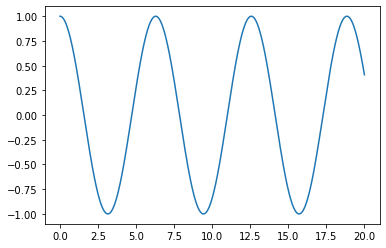

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = np.cos
t = np.linspace(0, 20, 1000)
plt.plot(t, f(t))

Notice that `f` and `f(t)` are different things. By itself, the symbol `f` refers to the function. With a following parentheses and any required arguments, `f(t)` returns whatever was listed after the `return` statement inside of the function. If these is no `return` statement of if there is nothing listed then the function returns `None`.

In [3]:
print("f = ", f)
print("f(0) = ", f(0))

f =  <ufunc 'cos'>
f(0) =  1.0


#### Create simple functions with `lambda`

There are many situations where all you need is a simple function to encapsulate a calculation that can be done in one line of Python code. Python's `lambda` statement is ideal for this purpose. Learning to use the `lambda` function well allows you to write more compact and readable code.

The following cell uses `lambda` to create a function `f(t)` with a single argument `t` that returns the exponentially damped sinusoid $e^{-t/4} sin(t)$.

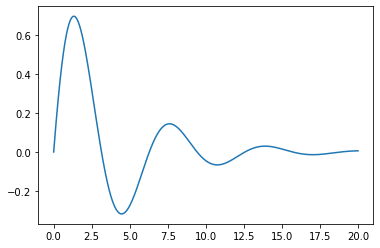

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = lambda t: np.exp(-t/4) * np.sin(t)
t = np.linspace(0, 20, 1000)
plt.plot(t, f(t))

It's hard to overstate the utility of `lambda` functions when combined with other features of Python. For example, while `lambda` functions are limited to one line statements, when combined with Python's conditional expression your code can incorporate logical conditions.  

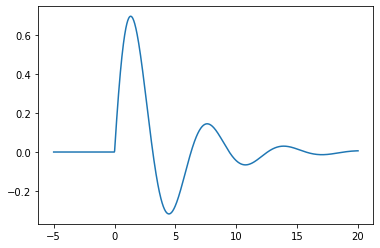

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = np.vectorize(lambda t: np.exp(-t/4) * np.sin(t) if t >= 0 else 0.0)
t = np.linspace(-5, 20, 1000)
plt.plot(t, f(t))

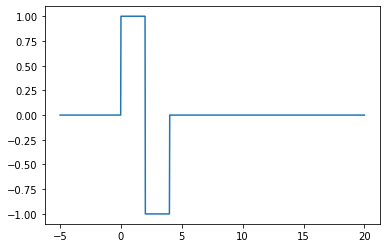

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = np.vectorize(lambda t: 0.0 if t < 0 else 1.0 if t < 2 else -1.0 if t < 4 else 0.0)
t = np.linspace(-5, 20, 1000)
plt.plot(t, f(t))

#### Create complex functions with `def`

Python provides two methods of creating functions. The most general method is the `def` statement that defines the name and arguments of a function, followed by accompanying `return` statement to specifies what the function returns.

As an example, the following code creates a function that takes a value time ($t$), position ($x$), and velocity ($v$), and returns the a two element array corresponding to the right hand side of the differential equations

In [7]:
import numpy as np

def deriv(t, *args):
    x = args[0]
    v = args[1]
    return np.array([v,  f(t)])

u = np.cos

deriv(0, 0, 0)

array([0., 1.])

### Comprehensions

### `map`, `filter`, `reduce`

https://medium.com/better-programming/how-to-replace-your-python-for-loops-with-map-filter-and-reduce-c1b5fa96f43a

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plotter(*titles, **kwargs):
    """Returns a list of axes corresponding to a given list of title strings."""
    fig, ax = plt.subplots(len(titles), figsize=(8, 1+2.5*len(titles)), **kwargs)
    if len(titles) > 1:
        for (a, title) in zip(ax, titles):
            a.set_xlabel("time / seconds")
            a.set_title(title)
            a.grid(True)
        fig.tight_layout()
    else:
        print(type(ax))
        ax.set_xlabel("time / seconds")
        ax.set_title(titles[0])
        ax.grid(True)
    return ax

## plotter()

`plotter()` is a function that simplifies creation of figures with the mulitple plotting axes. 

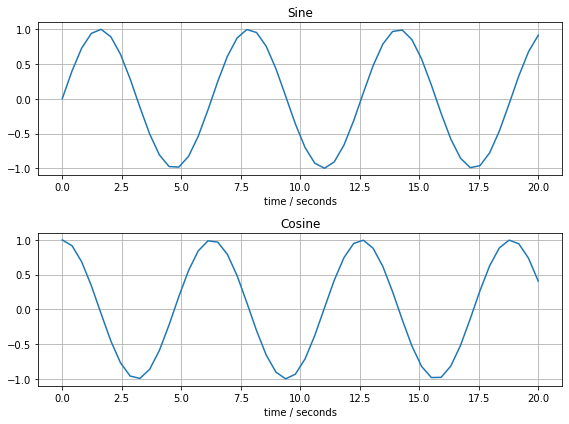

In [11]:
%reload_ext autoreload
%matplotlib inline

import numpy as np


t = np.linspace(0, 20)
s = np.sin(t)
c = np.cos(t)

sin, cos = plotter('Sine', 'Cosine')
sin.plot(t, s)
cos.plot(t, c)